# Functional API Practice
***
This lab will demonstrate how to build models with the `Functional` syntax. You'll build one using the `Sequential API` and see how you can do the same with the Functional API. Both will arrive at the same architecture and you can train and evaluate it as usual.

### Imports
***

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model

### Sequential API
***
Here is how we use Sequential() class to build a model.

In [ ]:
def build_model_with_sequential():

  seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                          tf.keras.layers.Dense(units=128, activation='relu'),
                                          tf.keras.layers.Dense(units=10, activation='softmax')])
  
  return seq_model

In [ ]:
sequential = build_model_with_sequential()

In [ ]:
sequential.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Functional API
***
And here is how you build the same model above with the functional syntax.

In [ ]:
def build_model_with_functional():

  input_layer = tf.keras.Input(shape=(28, 28))

  flatten_layer = tf.keras.layers.Flatten()(input_layer)
  first_dense = tf.keras.layers.Dense(units=128, activation='relu')(flatten_layer)
  output_layer = tf.keras.layers.Dense(units=10, activation='softmax')(first_dense)

  func_model = Model(inputs=input_layer, outputs=output_layer)

  return func_model

In [ ]:
functional = build_model_with_functional()

In [ ]:
functional.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Visualize the model graph
***
You can choose how to build your model below. Just uncomment which function you'd like to use. You'll notice that the plot will look the same.

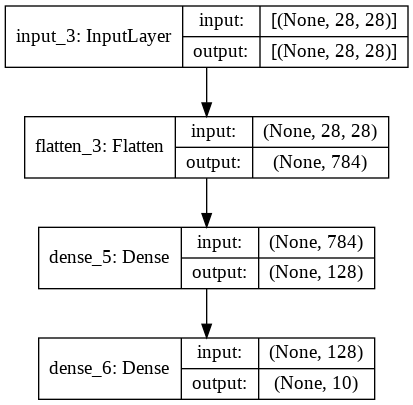

In [ ]:
plot_model(functional, show_shapes=True, show_layer_names=True, to_file='model.png')

### Training the model
***
Regardless if you built the Sequential or Functional API, you'll follow the same steps when training and evaluating your model.

In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images, test_images = training_images / 255., test_images / 255. 

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
functional.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
functional.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9264
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1110 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0772 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0566 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0441 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0339 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0275 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0227 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0183 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [ ]:
functional.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0754 - accuracy: 0.9786


[0.0754142701625824, 0.978600025177002]